In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
fraudcheck=pd.read_csv("D:\\ExcelR Assignments\\Random Forest\\Fraud_check.csv")
fraudcheck.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraudcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraudcheck=fraudcheck.rename({'Taxable.Income':'TaxInc'},axis=1)
fraudcheck.head()

,Undergrad,Marital.Status,TaxInc,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


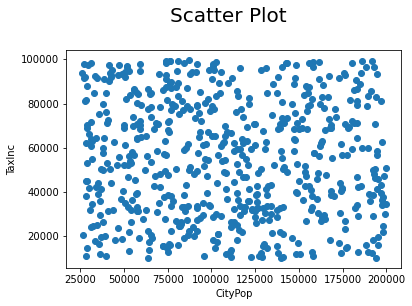

In [15]:
fraudcheck=fraudcheck.rename({'City.Population':'CityPop'},axis=1)
plt.xlabel("CityPop")
plt.ylabel("TaxInc")
plt.suptitle("Scatter Plot",size=20,y=1.03)
plt.scatter(fraudcheck.CityPop,fraudcheck.TaxInc)

In [16]:
fraudcheck["Taxveri"]=fraudcheck.TaxInc.map(lambda x: 'Risky' if x<=30000 else 'Good')
fraudcheck.head()

,Undergrad,Marital.Status,TaxInc,CityPop,Work.Experience,Urban,Taxveri
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [17]:
fraudveri=pd.get_dummies(fraudcheck,columns=['Undergrad','Marital.Status','Urban'])
fraudveri.head()

,TaxInc,CityPop,Work.Experience,Taxveri,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,Good,1,0,0,0,1,0,1
1,33700,134075,18,Good,0,1,1,0,0,0,1
2,36925,160205,30,Good,1,0,0,1,0,0,1
3,50190,193264,15,Good,0,1,0,0,1,0,1
4,81002,27533,28,Good,1,0,0,1,0,1,0


In [18]:
fraudveri["Taxveri"].value_counts()

Good     476
Risky    124
Name: Taxveri, dtype: int64

(array([476.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

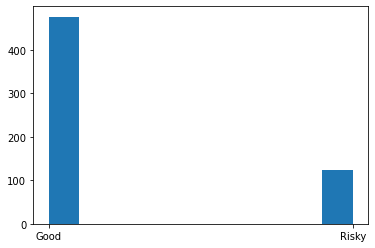

In [19]:
plt.hist(fraudveri["Taxveri"])

<AxesSubplot:xlabel='Taxveri'>

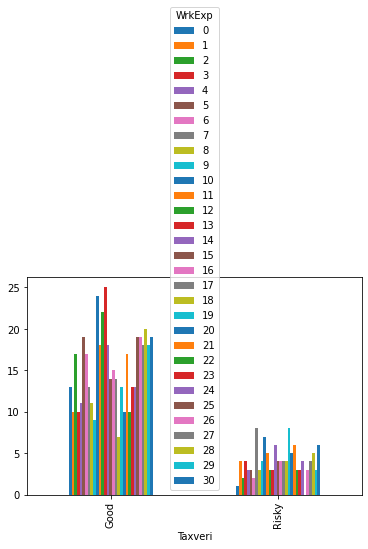

In [20]:
fraudveri=fraudveri.rename({'Work.Experience':'WrkExp'},axis=1)
pd.crosstab(fraudveri.Taxveri,fraudveri.WrkExp).plot(kind='bar')

In [21]:
labelencoder=LabelEncoder()
fraudveri["Taxveri"]=labelencoder.fit_transform(fraudveri["Taxveri"])
fraudveri.head()

,TaxInc,CityPop,WrkExp,Taxveri,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,0,1,0,0,0,1,0,1
1,33700,134075,18,0,0,1,1,0,0,0,1
2,36925,160205,30,0,1,0,0,1,0,0,1
3,50190,193264,15,0,0,1,0,0,1,0,1
4,81002,27533,28,0,1,0,0,1,0,1,0


# Random Forest Model

In [26]:
columns=['CityPop','WrkExp','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']

In [27]:
X=fraudveri[columns]
Y=fraudveri["Taxveri"]

In [28]:
kfold=KFold(n_splits=6,random_state=18,shuffle=True)
model=RandomForestClassifier(n_estimators=20,max_features=4)
results=cross_val_score(model,X,Y,cv=kfold)

In [29]:
results.mean()*100

74.5